In [1]:
# 📌 STEP 1: Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 📌 STEP 2: Load Dataset
df = pd.read_csv("../datasets/dataset-final.csv", low_memory=False)

# Pilih fitur yang relevan
features = [
    'failed_count_last_5min',
    'failed_ratio_last_5min',
    'unique_user_ids_last_5min'
]

# Gunakan kolom 'attack_type' sebagai label
# Buat label biner: brute_force = 1, lainnya = 0
df['label'] = df['attack_type'].astype(str).apply(lambda x: 1 if x in ["1", "2", "3", "4"] else 0)

X = df[features]
y = df['label']


In [3]:
# 📌 STEP 3: Normalisasi Fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# 📌 STEP 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [5]:
# 📌 STEP 5: Training SVM
#model = SVC(kernel='rbf', random_state=42)
model = SGDClassifier(
    loss='hinge',
    class_weight='balanced',
    #class_weight=None,
    max_iter=10000,
    random_state=42,
    verbose=1,
    n_jobs=-1
)
model.fit(X_train, y_train)


-- Epoch 1
Norm: 42.64, NNZs: 3, Bias: -2.671856, T: 700000, Avg. loss: 0.509437
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 42.73, NNZs: 3, Bias: -2.929120, T: 1400000, Avg. loss: 0.483109
Total training time: 0.24 seconds.
-- Epoch 3
Norm: 42.69, NNZs: 3, Bias: -2.900835, T: 2100000, Avg. loss: 0.484703
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 42.67, NNZs: 3, Bias: -2.784054, T: 2800000, Avg. loss: 0.487069
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 42.62, NNZs: 3, Bias: -2.984823, T: 3500000, Avg. loss: 0.487774
Total training time: 0.61 seconds.
-- Epoch 6
Norm: 42.59, NNZs: 3, Bias: -2.942581, T: 4200000, Avg. loss: 0.488981
Total training time: 0.73 seconds.
-- Epoch 7
Norm: 42.57, NNZs: 3, Bias: -2.984343, T: 4900000, Avg. loss: 0.489887
Total training time: 0.84 seconds.
Convergence after 7 epochs took 0.84 seconds


SGDClassifier(class_weight='balanced', max_iter=10000, n_jobs=-1,
              random_state=42, verbose=1)

Confusion Matrix:
[[219470   4878]
 [  1211  74441]]

Classification Report:
              precision    recall  f1-score   support

           0   0.994512  0.978257  0.986318    224348
           1   0.938501  0.983992  0.960709     75652

    accuracy                       0.979703    300000
   macro avg   0.966507  0.981125  0.973513    300000
weighted avg   0.980388  0.979703  0.979860    300000



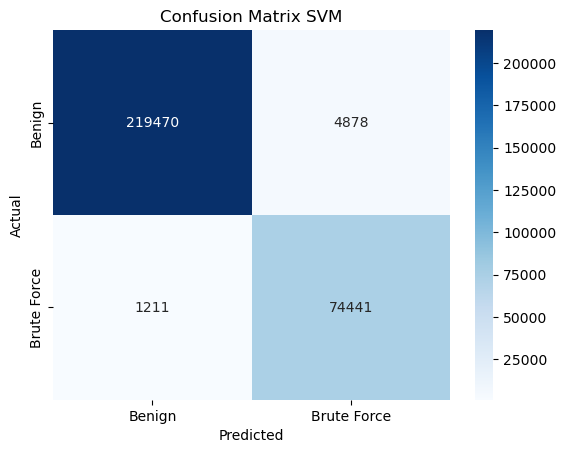

In [6]:
# 📌 STEP 6: Evaluasi Model
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Brute Force'], yticklabels=['Benign', 'Brute Force'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()

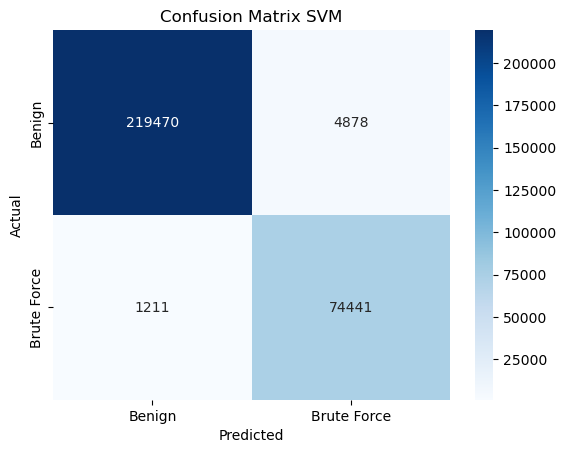

In [7]:
# 📌 (Opsional) Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Brute Force'], yticklabels=['Benign', 'Brute Force'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVM")
plt.show()


In [10]:
import joblib

# 📌 STEP 7: Simpan model dan scaler
joblib.dump(model, "../models/svm_bruteforce_final_linear_balanced.pkl")
joblib.dump(scaler, "../models/svm_scaler__final_linear_balanced.pkl")
print("✅ Model dan scaler berhasil disimpan.")


✅ Model dan scaler berhasil disimpan.
